In [36]:
# I/O
import pickle

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from utils.plot_utils import plot_confusion_matrix

# Numerical
import scipy as sp
import numpy as np
import pandas as pd

# Machine Learning
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV

# Models
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [19]:
# loading bag of ingredients represetation
boi = pd.read_csv('dataset/bag_of_ingre_w_cuisine.csv', index_col=0)
cuisines_df = pd.read_csv('dataset/Cuisines.csv', names=['cuisine'])

# make boi cuisine labels match actual cuisine labels
boi['cuisine'] = boi['cuisine'].transform(lambda x: x+1, axis=0)

In [20]:
boi.head()

,acorn_squash,adobo,african_birdseye_chile_pepper,ale,aleppo_pepper,alfalfa_sprouts,alfredo_sauce,allspice,almond,almond_butter,...,yeast,yellow_curry_paste,yellow_food_coloring,yellow_split_pea,yellow_squash,yogurt,zaatar,zest,zucchini,cuisine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
cuisines_df

,cuisine
1,Chinese
2,English
3,French
4,German
5,Greek
6,Indian
7,Italian
8,Japanese
9,Mexican
10,Moroccan


In [22]:
# Split into data and labels

X = boi.drop(["cuisine"], axis=1)
y = boi["cuisine"]

In [23]:
# Split into train/valid/test

X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=444)
## X_train_ho, X_valid, y_train_ho, y_valid = train_test_split(X_train_cv, y_train_cv, test_size=0.20, random_state=42)

## Hyperparameter Tuning

## 1. Logistic Regression

In [9]:
# # GridSearch with CrossValidation

from sklearn.linear_model import LogisticRegression

# Define values to be grid-searched over for parameter C - the regularisation parameter
C = np.logspace(-1, 2, 10)

# Define the Pipeline
log_reg = LogisticRegression(max_iter=1000)
log_reg_pipe = Pipeline([('log_reg', log_reg)])

param_grid = {'log_reg__C' : C}

# CV to select best hyperparameter and refit
log_reg_cv = GridSearchCV(log_reg_pipe, cv=10, param_grid=param_grid, scoring='accuracy', refit=True, verbose=2)
log_reg_cv.fit(X_train_cv, y_train_cv)

# Print result
print("Selected hyperparameter:", log_reg_cv.best_params_)
print("Best score:", log_reg_cv.best_score_)

log_reg_C = log_reg_cv.best_params_['log_reg__C']

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END .....................................log_reg__C=0.1; total time=   0.4s
[CV] END .....................................log_reg__C=0.1; total time=   0.3s
[CV] END .....................................log_reg__C=0.1; total time=   0.3s
[CV] END .....................................log_reg__C=0.1; total time=   0.4s
[CV] END .....................................log_reg__C=0.1; total time=   0.3s
[CV] END .....................................log_reg__C=0.1; total time=   0.3s
[CV] END .....................................log_reg__C=0.1; total time=   0.3s
[CV] END .....................................log_reg__C=0.1; total time=   0.3s
[CV] END .....................................log_reg__C=0.1; total time=   0.3s
[CV] END .....................................log_reg__C=0.1; total time=   0.3s
[CV] END .....................log_reg__C=0.21544346900318834; total time=   0.4s
[CV] END .....................log_reg__C=0.215

## 2. Support Vector Classification

In [24]:
# # GridSearch with CrossValidation

from sklearn.svm import SVC

# Define values to be grid-searched over for parameter C - the regularisation parameter
C = np.logspace(-5, 2, 20)

# Define the Pipeline
svc = SVC(random_state=42)
svc_pipe = Pipeline([('svc', svc)])

param_grid = {'svc__kernel' : ['rbf'], 'svc__C': C}

# CV to select best hyperparameter and refit
svc_cv = GridSearchCV(svc_pipe, cv=10, param_grid=param_grid, scoring='accuracy', refit=True, verbose=2)
svc_cv.fit(X_train_cv, y_train_cv)

# Print result
print("Selected hyperparameter:", svc_cv.best_params_)
print("Best score:", svc_cv.best_score_)

svc_C = svc_cv.best_params_['svc__C']

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END ......................svc__C=1e-05, svc__kernel=rbf; total time=   3.7s
[CV] END ......................svc__C=1e-05, svc__kernel=rbf; total time=   3.7s
[CV] END ......................svc__C=1e-05, svc__kernel=rbf; total time=   3.8s
[CV] END ......................svc__C=1e-05, svc__kernel=rbf; total time=   3.7s
[CV] END ......................svc__C=1e-05, svc__kernel=rbf; total time=   3.7s
[CV] END ......................svc__C=1e-05, svc__kernel=rbf; total time=   3.7s
[CV] END ......................svc__C=1e-05, svc__kernel=rbf; total time=   3.7s
[CV] END ......................svc__C=1e-05, svc__kernel=rbf; total time=   3.7s
[CV] END ......................svc__C=1e-05, svc__kernel=rbf; total time=   3.7s
[CV] END ......................svc__C=1e-05, svc__kernel=rbf; total time=   3.7s
[CV] END .....svc__C=2.3357214690901213e-05, svc__kernel=rbf; total time=   3.8s
[CV] END .....svc__C=2.3357214690901213e-05, s

[CV] END ........svc__C=0.04832930238571752, svc__kernel=rbf; total time=   3.8s
[CV] END ........svc__C=0.04832930238571752, svc__kernel=rbf; total time=   3.8s
[CV] END ........svc__C=0.04832930238571752, svc__kernel=rbf; total time=   3.7s
[CV] END ........svc__C=0.04832930238571752, svc__kernel=rbf; total time=   3.7s
[CV] END ........svc__C=0.04832930238571752, svc__kernel=rbf; total time=   3.7s
[CV] END ........svc__C=0.04832930238571752, svc__kernel=rbf; total time=   3.8s
[CV] END ........svc__C=0.04832930238571752, svc__kernel=rbf; total time=   3.7s
[CV] END ........svc__C=0.04832930238571752, svc__kernel=rbf; total time=   3.7s
[CV] END ........svc__C=0.04832930238571752, svc__kernel=rbf; total time=   3.7s
[CV] END ........svc__C=0.11288378916846883, svc__kernel=rbf; total time=   3.1s
[CV] END ........svc__C=0.11288378916846883, svc__kernel=rbf; total time=   3.2s
[CV] END ........svc__C=0.11288378916846883, svc__kernel=rbf; total time=   3.2s
[CV] END ........svc__C=0.11

## 3. Random Forest

In [32]:
# # GridSearch with CrossValidation

from sklearn.ensemble import RandomForestClassifier

# Define values to be grid-searched over for parameter C - the regularisation parameter
max_depth = range(1,20)
n_estimators = range(25,75)

# Define the Pipeline
rf = RandomForestClassifier(random_state=42)
rf_pipe = Pipeline([('rf', rf)])

param_grid = {'rf__max_depth' : max_depth, 'rf__n_estimators': n_estimators}

# CV to select best hyperparameter and refit
rf_cv = GridSearchCV(rf_pipe, cv=3, param_grid=param_grid, scoring='accuracy', refit=True, verbose=2)
rf_cv.fit(X_train_cv, y_train_cv)

# Print result
print("Selected hyperparameter:", rf_cv.best_params_)
print("Best score:", rf_cv.best_score_)

rf_max_depth = rf_cv.best_params_['rf__max_depth']
rf_n_estimators = rf_cv.best_params_['rf__n_estimators']

Fitting 3 folds for each of 950 candidates, totalling 2850 fits
[CV] rf__max_depth=1, rf__n_estimators=25 ............................
[CV] ............. rf__max_depth=1, rf__n_estimators=25, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=25 ............................
[CV] ............. rf__max_depth=1, rf__n_estimators=25, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=25 ............................
[CV] ............. rf__max_depth=1, rf__n_estimators=25, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=26 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............. rf__max_depth=1, rf__n_estimators=26, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=26 ............................
[CV] ............. rf__max_depth=1, rf__n_estimators=26, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=26 ............................
[CV] ............. rf__max_depth=1, rf__n_estimators=26, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=27 ............................
[CV] ............. rf__max_depth=1, rf__n_estimators=27, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=27 ............................
[CV] ............. rf__max_depth=1, rf__n_estimators=27, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=27 ............................
[CV] ............. rf__max_depth=1, rf__n_estimators=27, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=28 ............................
[CV] ............. rf__max_depth=1, rf__n_estimators=28, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=28 ............................
[CV] .

[CV] ............. rf__max_depth=1, rf__n_estimators=45, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=46 ............................
[CV] ............. rf__max_depth=1, rf__n_estimators=46, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=46 ............................
[CV] ............. rf__max_depth=1, rf__n_estimators=46, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=46 ............................
[CV] ............. rf__max_depth=1, rf__n_estimators=46, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=47 ............................
[CV] ............. rf__max_depth=1, rf__n_estimators=47, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=47 ............................
[CV] ............. rf__max_depth=1, rf__n_estimators=47, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=47 ............................
[CV] ............. rf__max_depth=1, rf__n_estimators=47, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=48 ............................
[CV] .

[CV] ............. rf__max_depth=1, rf__n_estimators=65, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=65 ............................
[CV] ............. rf__max_depth=1, rf__n_estimators=65, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=65 ............................
[CV] ............. rf__max_depth=1, rf__n_estimators=65, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=66 ............................
[CV] ............. rf__max_depth=1, rf__n_estimators=66, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=66 ............................
[CV] ............. rf__max_depth=1, rf__n_estimators=66, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=66 ............................
[CV] ............. rf__max_depth=1, rf__n_estimators=66, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=67 ............................
[CV] ............. rf__max_depth=1, rf__n_estimators=67, total=   0.1s
[CV] rf__max_depth=1, rf__n_estimators=67 ............................
[CV] .

[CV] ............. rf__max_depth=2, rf__n_estimators=34, total=   0.1s
[CV] rf__max_depth=2, rf__n_estimators=35 ............................
[CV] ............. rf__max_depth=2, rf__n_estimators=35, total=   0.1s
[CV] rf__max_depth=2, rf__n_estimators=35 ............................
[CV] ............. rf__max_depth=2, rf__n_estimators=35, total=   0.1s
[CV] rf__max_depth=2, rf__n_estimators=35 ............................
[CV] ............. rf__max_depth=2, rf__n_estimators=35, total=   0.1s
[CV] rf__max_depth=2, rf__n_estimators=36 ............................
[CV] ............. rf__max_depth=2, rf__n_estimators=36, total=   0.1s
[CV] rf__max_depth=2, rf__n_estimators=36 ............................
[CV] ............. rf__max_depth=2, rf__n_estimators=36, total=   0.1s
[CV] rf__max_depth=2, rf__n_estimators=36 ............................
[CV] ............. rf__max_depth=2, rf__n_estimators=36, total=   0.1s
[CV] rf__max_depth=2, rf__n_estimators=37 ............................
[CV] .

[CV] ............. rf__max_depth=2, rf__n_estimators=54, total=   0.1s
[CV] rf__max_depth=2, rf__n_estimators=54 ............................
[CV] ............. rf__max_depth=2, rf__n_estimators=54, total=   0.1s
[CV] rf__max_depth=2, rf__n_estimators=54 ............................
[CV] ............. rf__max_depth=2, rf__n_estimators=54, total=   0.1s
[CV] rf__max_depth=2, rf__n_estimators=55 ............................
[CV] ............. rf__max_depth=2, rf__n_estimators=55, total=   0.1s
[CV] rf__max_depth=2, rf__n_estimators=55 ............................
[CV] ............. rf__max_depth=2, rf__n_estimators=55, total=   0.1s
[CV] rf__max_depth=2, rf__n_estimators=55 ............................
[CV] ............. rf__max_depth=2, rf__n_estimators=55, total=   0.1s
[CV] rf__max_depth=2, rf__n_estimators=56 ............................
[CV] ............. rf__max_depth=2, rf__n_estimators=56, total=   0.1s
[CV] rf__max_depth=2, rf__n_estimators=56 ............................
[CV] .

[CV] ............. rf__max_depth=2, rf__n_estimators=73, total=   0.1s
[CV] rf__max_depth=2, rf__n_estimators=73 ............................
[CV] ............. rf__max_depth=2, rf__n_estimators=73, total=   0.1s
[CV] rf__max_depth=2, rf__n_estimators=74 ............................
[CV] ............. rf__max_depth=2, rf__n_estimators=74, total=   0.1s
[CV] rf__max_depth=2, rf__n_estimators=74 ............................
[CV] ............. rf__max_depth=2, rf__n_estimators=74, total=   0.1s
[CV] rf__max_depth=2, rf__n_estimators=74 ............................
[CV] ............. rf__max_depth=2, rf__n_estimators=74, total=   0.2s
[CV] rf__max_depth=3, rf__n_estimators=25 ............................
[CV] ............. rf__max_depth=3, rf__n_estimators=25, total=   0.1s
[CV] rf__max_depth=3, rf__n_estimators=25 ............................
[CV] ............. rf__max_depth=3, rf__n_estimators=25, total=   0.1s
[CV] rf__max_depth=3, rf__n_estimators=25 ............................
[CV] .

[CV] ............. rf__max_depth=3, rf__n_estimators=43, total=   0.1s
[CV] rf__max_depth=3, rf__n_estimators=43 ............................
[CV] ............. rf__max_depth=3, rf__n_estimators=43, total=   0.1s
[CV] rf__max_depth=3, rf__n_estimators=43 ............................
[CV] ............. rf__max_depth=3, rf__n_estimators=43, total=   0.1s
[CV] rf__max_depth=3, rf__n_estimators=44 ............................
[CV] ............. rf__max_depth=3, rf__n_estimators=44, total=   0.1s
[CV] rf__max_depth=3, rf__n_estimators=44 ............................
[CV] ............. rf__max_depth=3, rf__n_estimators=44, total=   0.1s
[CV] rf__max_depth=3, rf__n_estimators=44 ............................
[CV] ............. rf__max_depth=3, rf__n_estimators=44, total=   0.1s
[CV] rf__max_depth=3, rf__n_estimators=45 ............................
[CV] ............. rf__max_depth=3, rf__n_estimators=45, total=   0.1s
[CV] rf__max_depth=3, rf__n_estimators=45 ............................
[CV] .

[CV] ............. rf__max_depth=3, rf__n_estimators=62, total=   0.1s
[CV] rf__max_depth=3, rf__n_estimators=62 ............................
[CV] ............. rf__max_depth=3, rf__n_estimators=62, total=   0.1s
[CV] rf__max_depth=3, rf__n_estimators=63 ............................
[CV] ............. rf__max_depth=3, rf__n_estimators=63, total=   0.2s
[CV] rf__max_depth=3, rf__n_estimators=63 ............................
[CV] ............. rf__max_depth=3, rf__n_estimators=63, total=   0.1s
[CV] rf__max_depth=3, rf__n_estimators=63 ............................
[CV] ............. rf__max_depth=3, rf__n_estimators=63, total=   0.1s
[CV] rf__max_depth=3, rf__n_estimators=64 ............................
[CV] ............. rf__max_depth=3, rf__n_estimators=64, total=   0.1s
[CV] rf__max_depth=3, rf__n_estimators=64 ............................
[CV] ............. rf__max_depth=3, rf__n_estimators=64, total=   0.1s
[CV] rf__max_depth=3, rf__n_estimators=64 ............................
[CV] .

[CV] ............. rf__max_depth=4, rf__n_estimators=32, total=   0.1s
[CV] rf__max_depth=4, rf__n_estimators=32 ............................
[CV] ............. rf__max_depth=4, rf__n_estimators=32, total=   0.1s
[CV] rf__max_depth=4, rf__n_estimators=33 ............................
[CV] ............. rf__max_depth=4, rf__n_estimators=33, total=   0.1s
[CV] rf__max_depth=4, rf__n_estimators=33 ............................
[CV] ............. rf__max_depth=4, rf__n_estimators=33, total=   0.1s
[CV] rf__max_depth=4, rf__n_estimators=33 ............................
[CV] ............. rf__max_depth=4, rf__n_estimators=33, total=   0.1s
[CV] rf__max_depth=4, rf__n_estimators=34 ............................
[CV] ............. rf__max_depth=4, rf__n_estimators=34, total=   0.1s
[CV] rf__max_depth=4, rf__n_estimators=34 ............................
[CV] ............. rf__max_depth=4, rf__n_estimators=34, total=   0.1s
[CV] rf__max_depth=4, rf__n_estimators=34 ............................
[CV] .

[CV] ............. rf__max_depth=4, rf__n_estimators=52, total=   0.1s
[CV] rf__max_depth=4, rf__n_estimators=52 ............................
[CV] ............. rf__max_depth=4, rf__n_estimators=52, total=   0.1s
[CV] rf__max_depth=4, rf__n_estimators=52 ............................
[CV] ............. rf__max_depth=4, rf__n_estimators=52, total=   0.1s
[CV] rf__max_depth=4, rf__n_estimators=53 ............................
[CV] ............. rf__max_depth=4, rf__n_estimators=53, total=   0.1s
[CV] rf__max_depth=4, rf__n_estimators=53 ............................
[CV] ............. rf__max_depth=4, rf__n_estimators=53, total=   0.1s
[CV] rf__max_depth=4, rf__n_estimators=53 ............................
[CV] ............. rf__max_depth=4, rf__n_estimators=53, total=   0.1s
[CV] rf__max_depth=4, rf__n_estimators=54 ............................
[CV] ............. rf__max_depth=4, rf__n_estimators=54, total=   0.2s
[CV] rf__max_depth=4, rf__n_estimators=54 ............................
[CV] .

[CV] ............. rf__max_depth=4, rf__n_estimators=71, total=   0.2s
[CV] rf__max_depth=4, rf__n_estimators=71 ............................
[CV] ............. rf__max_depth=4, rf__n_estimators=71, total=   0.2s
[CV] rf__max_depth=4, rf__n_estimators=72 ............................
[CV] ............. rf__max_depth=4, rf__n_estimators=72, total=   0.2s
[CV] rf__max_depth=4, rf__n_estimators=72 ............................
[CV] ............. rf__max_depth=4, rf__n_estimators=72, total=   0.2s
[CV] rf__max_depth=4, rf__n_estimators=72 ............................
[CV] ............. rf__max_depth=4, rf__n_estimators=72, total=   0.2s
[CV] rf__max_depth=4, rf__n_estimators=73 ............................
[CV] ............. rf__max_depth=4, rf__n_estimators=73, total=   0.2s
[CV] rf__max_depth=4, rf__n_estimators=73 ............................
[CV] ............. rf__max_depth=4, rf__n_estimators=73, total=   0.2s
[CV] rf__max_depth=4, rf__n_estimators=73 ............................
[CV] .

[CV] ............. rf__max_depth=5, rf__n_estimators=40, total=   0.1s
[CV] rf__max_depth=5, rf__n_estimators=41 ............................
[CV] ............. rf__max_depth=5, rf__n_estimators=41, total=   0.1s
[CV] rf__max_depth=5, rf__n_estimators=41 ............................
[CV] ............. rf__max_depth=5, rf__n_estimators=41, total=   0.1s
[CV] rf__max_depth=5, rf__n_estimators=41 ............................
[CV] ............. rf__max_depth=5, rf__n_estimators=41, total=   0.1s
[CV] rf__max_depth=5, rf__n_estimators=42 ............................
[CV] ............. rf__max_depth=5, rf__n_estimators=42, total=   0.1s
[CV] rf__max_depth=5, rf__n_estimators=42 ............................
[CV] ............. rf__max_depth=5, rf__n_estimators=42, total=   0.1s
[CV] rf__max_depth=5, rf__n_estimators=42 ............................
[CV] ............. rf__max_depth=5, rf__n_estimators=42, total=   0.1s
[CV] rf__max_depth=5, rf__n_estimators=43 ............................
[CV] .

[CV] ............. rf__max_depth=5, rf__n_estimators=60, total=   0.2s
[CV] rf__max_depth=5, rf__n_estimators=60 ............................
[CV] ............. rf__max_depth=5, rf__n_estimators=60, total=   0.2s
[CV] rf__max_depth=5, rf__n_estimators=60 ............................
[CV] ............. rf__max_depth=5, rf__n_estimators=60, total=   0.2s
[CV] rf__max_depth=5, rf__n_estimators=61 ............................
[CV] ............. rf__max_depth=5, rf__n_estimators=61, total=   0.2s
[CV] rf__max_depth=5, rf__n_estimators=61 ............................
[CV] ............. rf__max_depth=5, rf__n_estimators=61, total=   0.2s
[CV] rf__max_depth=5, rf__n_estimators=61 ............................
[CV] ............. rf__max_depth=5, rf__n_estimators=61, total=   0.2s
[CV] rf__max_depth=5, rf__n_estimators=62 ............................
[CV] ............. rf__max_depth=5, rf__n_estimators=62, total=   0.2s
[CV] rf__max_depth=5, rf__n_estimators=62 ............................
[CV] .

[CV] ............. rf__max_depth=6, rf__n_estimators=30, total=   0.1s
[CV] rf__max_depth=6, rf__n_estimators=30 ............................
[CV] ............. rf__max_depth=6, rf__n_estimators=30, total=   0.1s
[CV] rf__max_depth=6, rf__n_estimators=30 ............................
[CV] ............. rf__max_depth=6, rf__n_estimators=30, total=   0.1s
[CV] rf__max_depth=6, rf__n_estimators=31 ............................
[CV] ............. rf__max_depth=6, rf__n_estimators=31, total=   0.1s
[CV] rf__max_depth=6, rf__n_estimators=31 ............................
[CV] ............. rf__max_depth=6, rf__n_estimators=31, total=   0.1s
[CV] rf__max_depth=6, rf__n_estimators=31 ............................
[CV] ............. rf__max_depth=6, rf__n_estimators=31, total=   0.1s
[CV] rf__max_depth=6, rf__n_estimators=32 ............................
[CV] ............. rf__max_depth=6, rf__n_estimators=32, total=   0.1s
[CV] rf__max_depth=6, rf__n_estimators=32 ............................
[CV] .

[CV] ............. rf__max_depth=6, rf__n_estimators=49, total=   0.2s
[CV] rf__max_depth=6, rf__n_estimators=49 ............................
[CV] ............. rf__max_depth=6, rf__n_estimators=49, total=   0.2s
[CV] rf__max_depth=6, rf__n_estimators=50 ............................
[CV] ............. rf__max_depth=6, rf__n_estimators=50, total=   0.2s
[CV] rf__max_depth=6, rf__n_estimators=50 ............................
[CV] ............. rf__max_depth=6, rf__n_estimators=50, total=   0.2s
[CV] rf__max_depth=6, rf__n_estimators=50 ............................
[CV] ............. rf__max_depth=6, rf__n_estimators=50, total=   0.2s
[CV] rf__max_depth=6, rf__n_estimators=51 ............................
[CV] ............. rf__max_depth=6, rf__n_estimators=51, total=   0.2s
[CV] rf__max_depth=6, rf__n_estimators=51 ............................
[CV] ............. rf__max_depth=6, rf__n_estimators=51, total=   0.2s
[CV] rf__max_depth=6, rf__n_estimators=51 ............................
[CV] .

[CV] ............. rf__max_depth=6, rf__n_estimators=69, total=   0.2s
[CV] rf__max_depth=6, rf__n_estimators=69 ............................
[CV] ............. rf__max_depth=6, rf__n_estimators=69, total=   0.2s
[CV] rf__max_depth=6, rf__n_estimators=69 ............................
[CV] ............. rf__max_depth=6, rf__n_estimators=69, total=   0.2s
[CV] rf__max_depth=6, rf__n_estimators=70 ............................
[CV] ............. rf__max_depth=6, rf__n_estimators=70, total=   0.2s
[CV] rf__max_depth=6, rf__n_estimators=70 ............................
[CV] ............. rf__max_depth=6, rf__n_estimators=70, total=   0.2s
[CV] rf__max_depth=6, rf__n_estimators=70 ............................
[CV] ............. rf__max_depth=6, rf__n_estimators=70, total=   0.2s
[CV] rf__max_depth=6, rf__n_estimators=71 ............................
[CV] ............. rf__max_depth=6, rf__n_estimators=71, total=   0.2s
[CV] rf__max_depth=6, rf__n_estimators=71 ............................
[CV] .

[CV] ............. rf__max_depth=7, rf__n_estimators=38, total=   0.1s
[CV] rf__max_depth=7, rf__n_estimators=38 ............................
[CV] ............. rf__max_depth=7, rf__n_estimators=38, total=   0.1s
[CV] rf__max_depth=7, rf__n_estimators=39 ............................
[CV] ............. rf__max_depth=7, rf__n_estimators=39, total=   0.1s
[CV] rf__max_depth=7, rf__n_estimators=39 ............................
[CV] ............. rf__max_depth=7, rf__n_estimators=39, total=   0.1s
[CV] rf__max_depth=7, rf__n_estimators=39 ............................
[CV] ............. rf__max_depth=7, rf__n_estimators=39, total=   0.1s
[CV] rf__max_depth=7, rf__n_estimators=40 ............................
[CV] ............. rf__max_depth=7, rf__n_estimators=40, total=   0.2s
[CV] rf__max_depth=7, rf__n_estimators=40 ............................
[CV] ............. rf__max_depth=7, rf__n_estimators=40, total=   0.2s
[CV] rf__max_depth=7, rf__n_estimators=40 ............................
[CV] .

[CV] ............. rf__max_depth=7, rf__n_estimators=58, total=   0.2s
[CV] rf__max_depth=7, rf__n_estimators=58 ............................
[CV] ............. rf__max_depth=7, rf__n_estimators=58, total=   0.2s
[CV] rf__max_depth=7, rf__n_estimators=58 ............................
[CV] ............. rf__max_depth=7, rf__n_estimators=58, total=   0.2s
[CV] rf__max_depth=7, rf__n_estimators=59 ............................
[CV] ............. rf__max_depth=7, rf__n_estimators=59, total=   0.2s
[CV] rf__max_depth=7, rf__n_estimators=59 ............................
[CV] ............. rf__max_depth=7, rf__n_estimators=59, total=   0.2s
[CV] rf__max_depth=7, rf__n_estimators=59 ............................
[CV] ............. rf__max_depth=7, rf__n_estimators=59, total=   0.2s
[CV] rf__max_depth=7, rf__n_estimators=60 ............................
[CV] ............. rf__max_depth=7, rf__n_estimators=60, total=   0.2s
[CV] rf__max_depth=7, rf__n_estimators=60 ............................
[CV] .

[CV] ............. rf__max_depth=8, rf__n_estimators=27, total=   0.1s
[CV] rf__max_depth=8, rf__n_estimators=27 ............................
[CV] ............. rf__max_depth=8, rf__n_estimators=27, total=   0.1s
[CV] rf__max_depth=8, rf__n_estimators=28 ............................
[CV] ............. rf__max_depth=8, rf__n_estimators=28, total=   0.1s
[CV] rf__max_depth=8, rf__n_estimators=28 ............................
[CV] ............. rf__max_depth=8, rf__n_estimators=28, total=   0.1s
[CV] rf__max_depth=8, rf__n_estimators=28 ............................
[CV] ............. rf__max_depth=8, rf__n_estimators=28, total=   0.1s
[CV] rf__max_depth=8, rf__n_estimators=29 ............................
[CV] ............. rf__max_depth=8, rf__n_estimators=29, total=   0.1s
[CV] rf__max_depth=8, rf__n_estimators=29 ............................
[CV] ............. rf__max_depth=8, rf__n_estimators=29, total=   0.1s
[CV] rf__max_depth=8, rf__n_estimators=29 ............................
[CV] .

[CV] ............. rf__max_depth=8, rf__n_estimators=47, total=   0.2s
[CV] rf__max_depth=8, rf__n_estimators=47 ............................
[CV] ............. rf__max_depth=8, rf__n_estimators=47, total=   0.2s
[CV] rf__max_depth=8, rf__n_estimators=47 ............................
[CV] ............. rf__max_depth=8, rf__n_estimators=47, total=   0.2s
[CV] rf__max_depth=8, rf__n_estimators=48 ............................
[CV] ............. rf__max_depth=8, rf__n_estimators=48, total=   0.2s
[CV] rf__max_depth=8, rf__n_estimators=48 ............................
[CV] ............. rf__max_depth=8, rf__n_estimators=48, total=   0.2s
[CV] rf__max_depth=8, rf__n_estimators=48 ............................
[CV] ............. rf__max_depth=8, rf__n_estimators=48, total=   0.2s
[CV] rf__max_depth=8, rf__n_estimators=49 ............................
[CV] ............. rf__max_depth=8, rf__n_estimators=49, total=   0.2s
[CV] rf__max_depth=8, rf__n_estimators=49 ............................
[CV] .

[CV] ............. rf__max_depth=8, rf__n_estimators=66, total=   0.2s
[CV] rf__max_depth=8, rf__n_estimators=66 ............................
[CV] ............. rf__max_depth=8, rf__n_estimators=66, total=   0.2s
[CV] rf__max_depth=8, rf__n_estimators=67 ............................
[CV] ............. rf__max_depth=8, rf__n_estimators=67, total=   0.2s
[CV] rf__max_depth=8, rf__n_estimators=67 ............................
[CV] ............. rf__max_depth=8, rf__n_estimators=67, total=   0.2s
[CV] rf__max_depth=8, rf__n_estimators=67 ............................
[CV] ............. rf__max_depth=8, rf__n_estimators=67, total=   0.2s
[CV] rf__max_depth=8, rf__n_estimators=68 ............................
[CV] ............. rf__max_depth=8, rf__n_estimators=68, total=   0.2s
[CV] rf__max_depth=8, rf__n_estimators=68 ............................
[CV] ............. rf__max_depth=8, rf__n_estimators=68, total=   0.2s
[CV] rf__max_depth=8, rf__n_estimators=68 ............................
[CV] .

[CV] ............. rf__max_depth=9, rf__n_estimators=36, total=   0.2s
[CV] rf__max_depth=9, rf__n_estimators=36 ............................
[CV] ............. rf__max_depth=9, rf__n_estimators=36, total=   0.2s
[CV] rf__max_depth=9, rf__n_estimators=36 ............................
[CV] ............. rf__max_depth=9, rf__n_estimators=36, total=   0.2s
[CV] rf__max_depth=9, rf__n_estimators=37 ............................
[CV] ............. rf__max_depth=9, rf__n_estimators=37, total=   0.1s
[CV] rf__max_depth=9, rf__n_estimators=37 ............................
[CV] ............. rf__max_depth=9, rf__n_estimators=37, total=   0.2s
[CV] rf__max_depth=9, rf__n_estimators=37 ............................
[CV] ............. rf__max_depth=9, rf__n_estimators=37, total=   0.2s
[CV] rf__max_depth=9, rf__n_estimators=38 ............................
[CV] ............. rf__max_depth=9, rf__n_estimators=38, total=   0.2s
[CV] rf__max_depth=9, rf__n_estimators=38 ............................
[CV] .

[CV] ............. rf__max_depth=9, rf__n_estimators=55, total=   0.3s
[CV] rf__max_depth=9, rf__n_estimators=55 ............................
[CV] ............. rf__max_depth=9, rf__n_estimators=55, total=   0.2s
[CV] rf__max_depth=9, rf__n_estimators=56 ............................
[CV] ............. rf__max_depth=9, rf__n_estimators=56, total=   0.2s
[CV] rf__max_depth=9, rf__n_estimators=56 ............................
[CV] ............. rf__max_depth=9, rf__n_estimators=56, total=   0.2s
[CV] rf__max_depth=9, rf__n_estimators=56 ............................
[CV] ............. rf__max_depth=9, rf__n_estimators=56, total=   0.2s
[CV] rf__max_depth=9, rf__n_estimators=57 ............................
[CV] ............. rf__max_depth=9, rf__n_estimators=57, total=   0.2s
[CV] rf__max_depth=9, rf__n_estimators=57 ............................
[CV] ............. rf__max_depth=9, rf__n_estimators=57, total=   0.2s
[CV] rf__max_depth=9, rf__n_estimators=57 ............................
[CV] .

[CV] ............. rf__max_depth=9, rf__n_estimators=74, total=   0.3s
[CV] rf__max_depth=10, rf__n_estimators=25 ...........................
[CV] ............ rf__max_depth=10, rf__n_estimators=25, total=   0.1s
[CV] rf__max_depth=10, rf__n_estimators=25 ...........................
[CV] ............ rf__max_depth=10, rf__n_estimators=25, total=   0.1s
[CV] rf__max_depth=10, rf__n_estimators=25 ...........................
[CV] ............ rf__max_depth=10, rf__n_estimators=25, total=   0.1s
[CV] rf__max_depth=10, rf__n_estimators=26 ...........................
[CV] ............ rf__max_depth=10, rf__n_estimators=26, total=   0.1s
[CV] rf__max_depth=10, rf__n_estimators=26 ...........................
[CV] ............ rf__max_depth=10, rf__n_estimators=26, total=   0.1s
[CV] rf__max_depth=10, rf__n_estimators=26 ...........................
[CV] ............ rf__max_depth=10, rf__n_estimators=26, total=   0.1s
[CV] rf__max_depth=10, rf__n_estimators=27 ...........................
[CV] .

[CV] ............ rf__max_depth=10, rf__n_estimators=44, total=   0.2s
[CV] rf__max_depth=10, rf__n_estimators=44 ...........................
[CV] ............ rf__max_depth=10, rf__n_estimators=44, total=   0.2s
[CV] rf__max_depth=10, rf__n_estimators=44 ...........................
[CV] ............ rf__max_depth=10, rf__n_estimators=44, total=   0.2s
[CV] rf__max_depth=10, rf__n_estimators=45 ...........................
[CV] ............ rf__max_depth=10, rf__n_estimators=45, total=   0.2s
[CV] rf__max_depth=10, rf__n_estimators=45 ...........................
[CV] ............ rf__max_depth=10, rf__n_estimators=45, total=   0.2s
[CV] rf__max_depth=10, rf__n_estimators=45 ...........................
[CV] ............ rf__max_depth=10, rf__n_estimators=45, total=   0.2s
[CV] rf__max_depth=10, rf__n_estimators=46 ...........................
[CV] ............ rf__max_depth=10, rf__n_estimators=46, total=   0.2s
[CV] rf__max_depth=10, rf__n_estimators=46 ...........................
[CV] .

[CV] ............ rf__max_depth=10, rf__n_estimators=63, total=   0.3s
[CV] rf__max_depth=10, rf__n_estimators=63 ...........................
[CV] ............ rf__max_depth=10, rf__n_estimators=63, total=   0.3s
[CV] rf__max_depth=10, rf__n_estimators=64 ...........................
[CV] ............ rf__max_depth=10, rf__n_estimators=64, total=   0.3s
[CV] rf__max_depth=10, rf__n_estimators=64 ...........................
[CV] ............ rf__max_depth=10, rf__n_estimators=64, total=   0.3s
[CV] rf__max_depth=10, rf__n_estimators=64 ...........................
[CV] ............ rf__max_depth=10, rf__n_estimators=64, total=   0.3s
[CV] rf__max_depth=10, rf__n_estimators=65 ...........................
[CV] ............ rf__max_depth=10, rf__n_estimators=65, total=   0.3s
[CV] rf__max_depth=10, rf__n_estimators=65 ...........................
[CV] ............ rf__max_depth=10, rf__n_estimators=65, total=   0.3s
[CV] rf__max_depth=10, rf__n_estimators=65 ...........................
[CV] .

[CV] ............ rf__max_depth=11, rf__n_estimators=32, total=   0.2s
[CV] rf__max_depth=11, rf__n_estimators=33 ...........................
[CV] ............ rf__max_depth=11, rf__n_estimators=33, total=   0.2s
[CV] rf__max_depth=11, rf__n_estimators=33 ...........................
[CV] ............ rf__max_depth=11, rf__n_estimators=33, total=   0.2s
[CV] rf__max_depth=11, rf__n_estimators=33 ...........................
[CV] ............ rf__max_depth=11, rf__n_estimators=33, total=   0.2s
[CV] rf__max_depth=11, rf__n_estimators=34 ...........................
[CV] ............ rf__max_depth=11, rf__n_estimators=34, total=   0.2s
[CV] rf__max_depth=11, rf__n_estimators=34 ...........................
[CV] ............ rf__max_depth=11, rf__n_estimators=34, total=   0.2s
[CV] rf__max_depth=11, rf__n_estimators=34 ...........................
[CV] ............ rf__max_depth=11, rf__n_estimators=34, total=   0.2s
[CV] rf__max_depth=11, rf__n_estimators=35 ...........................
[CV] .

[CV] ............ rf__max_depth=11, rf__n_estimators=52, total=   0.2s
[CV] rf__max_depth=11, rf__n_estimators=52 ...........................
[CV] ............ rf__max_depth=11, rf__n_estimators=52, total=   0.2s
[CV] rf__max_depth=11, rf__n_estimators=52 ...........................
[CV] ............ rf__max_depth=11, rf__n_estimators=52, total=   0.2s
[CV] rf__max_depth=11, rf__n_estimators=53 ...........................
[CV] ............ rf__max_depth=11, rf__n_estimators=53, total=   0.2s
[CV] rf__max_depth=11, rf__n_estimators=53 ...........................
[CV] ............ rf__max_depth=11, rf__n_estimators=53, total=   0.2s
[CV] rf__max_depth=11, rf__n_estimators=53 ...........................
[CV] ............ rf__max_depth=11, rf__n_estimators=53, total=   0.2s
[CV] rf__max_depth=11, rf__n_estimators=54 ...........................
[CV] ............ rf__max_depth=11, rf__n_estimators=54, total=   0.2s
[CV] rf__max_depth=11, rf__n_estimators=54 ...........................
[CV] .

[CV] ............ rf__max_depth=11, rf__n_estimators=71, total=   0.3s
[CV] rf__max_depth=11, rf__n_estimators=71 ...........................
[CV] ............ rf__max_depth=11, rf__n_estimators=71, total=   0.3s
[CV] rf__max_depth=11, rf__n_estimators=72 ...........................
[CV] ............ rf__max_depth=11, rf__n_estimators=72, total=   0.3s
[CV] rf__max_depth=11, rf__n_estimators=72 ...........................
[CV] ............ rf__max_depth=11, rf__n_estimators=72, total=   0.3s
[CV] rf__max_depth=11, rf__n_estimators=72 ...........................
[CV] ............ rf__max_depth=11, rf__n_estimators=72, total=   0.3s
[CV] rf__max_depth=11, rf__n_estimators=73 ...........................
[CV] ............ rf__max_depth=11, rf__n_estimators=73, total=   0.3s
[CV] rf__max_depth=11, rf__n_estimators=73 ...........................
[CV] ............ rf__max_depth=11, rf__n_estimators=73, total=   0.3s
[CV] rf__max_depth=11, rf__n_estimators=73 ...........................
[CV] .

[CV] ............ rf__max_depth=12, rf__n_estimators=41, total=   0.2s
[CV] rf__max_depth=12, rf__n_estimators=41 ...........................
[CV] ............ rf__max_depth=12, rf__n_estimators=41, total=   0.2s
[CV] rf__max_depth=12, rf__n_estimators=41 ...........................
[CV] ............ rf__max_depth=12, rf__n_estimators=41, total=   0.2s
[CV] rf__max_depth=12, rf__n_estimators=42 ...........................
[CV] ............ rf__max_depth=12, rf__n_estimators=42, total=   0.2s
[CV] rf__max_depth=12, rf__n_estimators=42 ...........................
[CV] ............ rf__max_depth=12, rf__n_estimators=42, total=   0.2s
[CV] rf__max_depth=12, rf__n_estimators=42 ...........................
[CV] ............ rf__max_depth=12, rf__n_estimators=42, total=   0.2s
[CV] rf__max_depth=12, rf__n_estimators=43 ...........................
[CV] ............ rf__max_depth=12, rf__n_estimators=43, total=   0.2s
[CV] rf__max_depth=12, rf__n_estimators=43 ...........................
[CV] .

[CV] ............ rf__max_depth=12, rf__n_estimators=60, total=   0.3s
[CV] rf__max_depth=12, rf__n_estimators=60 ...........................
[CV] ............ rf__max_depth=12, rf__n_estimators=60, total=   0.3s
[CV] rf__max_depth=12, rf__n_estimators=61 ...........................
[CV] ............ rf__max_depth=12, rf__n_estimators=61, total=   0.3s
[CV] rf__max_depth=12, rf__n_estimators=61 ...........................
[CV] ............ rf__max_depth=12, rf__n_estimators=61, total=   0.3s
[CV] rf__max_depth=12, rf__n_estimators=61 ...........................
[CV] ............ rf__max_depth=12, rf__n_estimators=61, total=   0.3s
[CV] rf__max_depth=12, rf__n_estimators=62 ...........................
[CV] ............ rf__max_depth=12, rf__n_estimators=62, total=   0.3s
[CV] rf__max_depth=12, rf__n_estimators=62 ...........................
[CV] ............ rf__max_depth=12, rf__n_estimators=62, total=   0.3s
[CV] rf__max_depth=12, rf__n_estimators=62 ...........................
[CV] .

[CV] ............ rf__max_depth=13, rf__n_estimators=30, total=   0.2s
[CV] rf__max_depth=13, rf__n_estimators=30 ...........................
[CV] ............ rf__max_depth=13, rf__n_estimators=30, total=   0.2s
[CV] rf__max_depth=13, rf__n_estimators=30 ...........................
[CV] ............ rf__max_depth=13, rf__n_estimators=30, total=   0.2s
[CV] rf__max_depth=13, rf__n_estimators=31 ...........................
[CV] ............ rf__max_depth=13, rf__n_estimators=31, total=   0.2s
[CV] rf__max_depth=13, rf__n_estimators=31 ...........................
[CV] ............ rf__max_depth=13, rf__n_estimators=31, total=   0.2s
[CV] rf__max_depth=13, rf__n_estimators=31 ...........................
[CV] ............ rf__max_depth=13, rf__n_estimators=31, total=   0.2s
[CV] rf__max_depth=13, rf__n_estimators=32 ...........................
[CV] ............ rf__max_depth=13, rf__n_estimators=32, total=   0.2s
[CV] rf__max_depth=13, rf__n_estimators=32 ...........................
[CV] .

[CV] ............ rf__max_depth=13, rf__n_estimators=49, total=   0.3s
[CV] rf__max_depth=13, rf__n_estimators=49 ...........................
[CV] ............ rf__max_depth=13, rf__n_estimators=49, total=   0.3s
[CV] rf__max_depth=13, rf__n_estimators=50 ...........................
[CV] ............ rf__max_depth=13, rf__n_estimators=50, total=   0.3s
[CV] rf__max_depth=13, rf__n_estimators=50 ...........................
[CV] ............ rf__max_depth=13, rf__n_estimators=50, total=   0.3s
[CV] rf__max_depth=13, rf__n_estimators=50 ...........................
[CV] ............ rf__max_depth=13, rf__n_estimators=50, total=   0.3s
[CV] rf__max_depth=13, rf__n_estimators=51 ...........................
[CV] ............ rf__max_depth=13, rf__n_estimators=51, total=   0.3s
[CV] rf__max_depth=13, rf__n_estimators=51 ...........................
[CV] ............ rf__max_depth=13, rf__n_estimators=51, total=   0.3s
[CV] rf__max_depth=13, rf__n_estimators=51 ...........................
[CV] .

[CV] ............ rf__max_depth=13, rf__n_estimators=68, total=   0.3s
[CV] rf__max_depth=13, rf__n_estimators=69 ...........................
[CV] ............ rf__max_depth=13, rf__n_estimators=69, total=   0.3s
[CV] rf__max_depth=13, rf__n_estimators=69 ...........................
[CV] ............ rf__max_depth=13, rf__n_estimators=69, total=   0.4s
[CV] rf__max_depth=13, rf__n_estimators=69 ...........................
[CV] ............ rf__max_depth=13, rf__n_estimators=69, total=   0.3s
[CV] rf__max_depth=13, rf__n_estimators=70 ...........................
[CV] ............ rf__max_depth=13, rf__n_estimators=70, total=   0.3s
[CV] rf__max_depth=13, rf__n_estimators=70 ...........................
[CV] ............ rf__max_depth=13, rf__n_estimators=70, total=   0.3s
[CV] rf__max_depth=13, rf__n_estimators=70 ...........................
[CV] ............ rf__max_depth=13, rf__n_estimators=70, total=   0.3s
[CV] rf__max_depth=13, rf__n_estimators=71 ...........................
[CV] .

[CV] ............ rf__max_depth=14, rf__n_estimators=38, total=   0.2s
[CV] rf__max_depth=14, rf__n_estimators=38 ...........................
[CV] ............ rf__max_depth=14, rf__n_estimators=38, total=   0.2s
[CV] rf__max_depth=14, rf__n_estimators=38 ...........................
[CV] ............ rf__max_depth=14, rf__n_estimators=38, total=   0.2s
[CV] rf__max_depth=14, rf__n_estimators=39 ...........................
[CV] ............ rf__max_depth=14, rf__n_estimators=39, total=   0.2s
[CV] rf__max_depth=14, rf__n_estimators=39 ...........................
[CV] ............ rf__max_depth=14, rf__n_estimators=39, total=   0.2s
[CV] rf__max_depth=14, rf__n_estimators=39 ...........................
[CV] ............ rf__max_depth=14, rf__n_estimators=39, total=   0.3s
[CV] rf__max_depth=14, rf__n_estimators=40 ...........................
[CV] ............ rf__max_depth=14, rf__n_estimators=40, total=   0.2s
[CV] rf__max_depth=14, rf__n_estimators=40 ...........................
[CV] .

[CV] ............ rf__max_depth=14, rf__n_estimators=57, total=   0.3s
[CV] rf__max_depth=14, rf__n_estimators=57 ...........................
[CV] ............ rf__max_depth=14, rf__n_estimators=57, total=   0.3s
[CV] rf__max_depth=14, rf__n_estimators=58 ...........................
[CV] ............ rf__max_depth=14, rf__n_estimators=58, total=   0.3s
[CV] rf__max_depth=14, rf__n_estimators=58 ...........................
[CV] ............ rf__max_depth=14, rf__n_estimators=58, total=   0.3s
[CV] rf__max_depth=14, rf__n_estimators=58 ...........................
[CV] ............ rf__max_depth=14, rf__n_estimators=58, total=   0.3s
[CV] rf__max_depth=14, rf__n_estimators=59 ...........................
[CV] ............ rf__max_depth=14, rf__n_estimators=59, total=   0.3s
[CV] rf__max_depth=14, rf__n_estimators=59 ...........................
[CV] ............ rf__max_depth=14, rf__n_estimators=59, total=   0.3s
[CV] rf__max_depth=14, rf__n_estimators=59 ...........................
[CV] .

[CV] ............ rf__max_depth=15, rf__n_estimators=26, total=   0.2s
[CV] rf__max_depth=15, rf__n_estimators=27 ...........................
[CV] ............ rf__max_depth=15, rf__n_estimators=27, total=   0.2s
[CV] rf__max_depth=15, rf__n_estimators=27 ...........................
[CV] ............ rf__max_depth=15, rf__n_estimators=27, total=   0.2s
[CV] rf__max_depth=15, rf__n_estimators=27 ...........................
[CV] ............ rf__max_depth=15, rf__n_estimators=27, total=   0.2s
[CV] rf__max_depth=15, rf__n_estimators=28 ...........................
[CV] ............ rf__max_depth=15, rf__n_estimators=28, total=   0.2s
[CV] rf__max_depth=15, rf__n_estimators=28 ...........................
[CV] ............ rf__max_depth=15, rf__n_estimators=28, total=   0.2s
[CV] rf__max_depth=15, rf__n_estimators=28 ...........................
[CV] ............ rf__max_depth=15, rf__n_estimators=28, total=   0.2s
[CV] rf__max_depth=15, rf__n_estimators=29 ...........................
[CV] .

[CV] ............ rf__max_depth=15, rf__n_estimators=46, total=   0.3s
[CV] rf__max_depth=15, rf__n_estimators=46 ...........................
[CV] ............ rf__max_depth=15, rf__n_estimators=46, total=   0.3s
[CV] rf__max_depth=15, rf__n_estimators=46 ...........................
[CV] ............ rf__max_depth=15, rf__n_estimators=46, total=   0.3s
[CV] rf__max_depth=15, rf__n_estimators=47 ...........................
[CV] ............ rf__max_depth=15, rf__n_estimators=47, total=   0.3s
[CV] rf__max_depth=15, rf__n_estimators=47 ...........................
[CV] ............ rf__max_depth=15, rf__n_estimators=47, total=   0.3s
[CV] rf__max_depth=15, rf__n_estimators=47 ...........................
[CV] ............ rf__max_depth=15, rf__n_estimators=47, total=   0.3s
[CV] rf__max_depth=15, rf__n_estimators=48 ...........................
[CV] ............ rf__max_depth=15, rf__n_estimators=48, total=   0.3s
[CV] rf__max_depth=15, rf__n_estimators=48 ...........................
[CV] .

[CV] ............ rf__max_depth=15, rf__n_estimators=65, total=   0.4s
[CV] rf__max_depth=15, rf__n_estimators=65 ...........................
[CV] ............ rf__max_depth=15, rf__n_estimators=65, total=   0.4s
[CV] rf__max_depth=15, rf__n_estimators=66 ...........................
[CV] ............ rf__max_depth=15, rf__n_estimators=66, total=   0.4s
[CV] rf__max_depth=15, rf__n_estimators=66 ...........................
[CV] ............ rf__max_depth=15, rf__n_estimators=66, total=   0.4s
[CV] rf__max_depth=15, rf__n_estimators=66 ...........................
[CV] ............ rf__max_depth=15, rf__n_estimators=66, total=   0.4s
[CV] rf__max_depth=15, rf__n_estimators=67 ...........................
[CV] ............ rf__max_depth=15, rf__n_estimators=67, total=   0.4s
[CV] rf__max_depth=15, rf__n_estimators=67 ...........................
[CV] ............ rf__max_depth=15, rf__n_estimators=67, total=   0.4s
[CV] rf__max_depth=15, rf__n_estimators=67 ...........................
[CV] .

[CV] ............ rf__max_depth=16, rf__n_estimators=34, total=   0.2s
[CV] rf__max_depth=16, rf__n_estimators=35 ...........................
[CV] ............ rf__max_depth=16, rf__n_estimators=35, total=   0.2s
[CV] rf__max_depth=16, rf__n_estimators=35 ...........................
[CV] ............ rf__max_depth=16, rf__n_estimators=35, total=   0.2s
[CV] rf__max_depth=16, rf__n_estimators=35 ...........................
[CV] ............ rf__max_depth=16, rf__n_estimators=35, total=   0.2s
[CV] rf__max_depth=16, rf__n_estimators=36 ...........................
[CV] ............ rf__max_depth=16, rf__n_estimators=36, total=   0.2s
[CV] rf__max_depth=16, rf__n_estimators=36 ...........................
[CV] ............ rf__max_depth=16, rf__n_estimators=36, total=   0.2s
[CV] rf__max_depth=16, rf__n_estimators=36 ...........................
[CV] ............ rf__max_depth=16, rf__n_estimators=36, total=   0.2s
[CV] rf__max_depth=16, rf__n_estimators=37 ...........................
[CV] .

[CV] ............ rf__max_depth=16, rf__n_estimators=54, total=   0.3s
[CV] rf__max_depth=16, rf__n_estimators=54 ...........................
[CV] ............ rf__max_depth=16, rf__n_estimators=54, total=   0.3s
[CV] rf__max_depth=16, rf__n_estimators=54 ...........................
[CV] ............ rf__max_depth=16, rf__n_estimators=54, total=   0.3s
[CV] rf__max_depth=16, rf__n_estimators=55 ...........................
[CV] ............ rf__max_depth=16, rf__n_estimators=55, total=   0.3s
[CV] rf__max_depth=16, rf__n_estimators=55 ...........................
[CV] ............ rf__max_depth=16, rf__n_estimators=55, total=   0.3s
[CV] rf__max_depth=16, rf__n_estimators=55 ...........................
[CV] ............ rf__max_depth=16, rf__n_estimators=55, total=   0.3s
[CV] rf__max_depth=16, rf__n_estimators=56 ...........................
[CV] ............ rf__max_depth=16, rf__n_estimators=56, total=   0.3s
[CV] rf__max_depth=16, rf__n_estimators=56 ...........................
[CV] .

[CV] ............ rf__max_depth=16, rf__n_estimators=73, total=   0.4s
[CV] rf__max_depth=16, rf__n_estimators=73 ...........................
[CV] ............ rf__max_depth=16, rf__n_estimators=73, total=   0.4s
[CV] rf__max_depth=16, rf__n_estimators=74 ...........................
[CV] ............ rf__max_depth=16, rf__n_estimators=74, total=   0.4s
[CV] rf__max_depth=16, rf__n_estimators=74 ...........................
[CV] ............ rf__max_depth=16, rf__n_estimators=74, total=   0.4s
[CV] rf__max_depth=16, rf__n_estimators=74 ...........................
[CV] ............ rf__max_depth=16, rf__n_estimators=74, total=   0.4s
[CV] rf__max_depth=17, rf__n_estimators=25 ...........................
[CV] ............ rf__max_depth=17, rf__n_estimators=25, total=   0.2s
[CV] rf__max_depth=17, rf__n_estimators=25 ...........................
[CV] ............ rf__max_depth=17, rf__n_estimators=25, total=   0.2s
[CV] rf__max_depth=17, rf__n_estimators=25 ...........................
[CV] .

[CV] ............ rf__max_depth=17, rf__n_estimators=42, total=   0.3s
[CV] rf__max_depth=17, rf__n_estimators=43 ...........................
[CV] ............ rf__max_depth=17, rf__n_estimators=43, total=   0.3s
[CV] rf__max_depth=17, rf__n_estimators=43 ...........................
[CV] ............ rf__max_depth=17, rf__n_estimators=43, total=   0.3s
[CV] rf__max_depth=17, rf__n_estimators=43 ...........................
[CV] ............ rf__max_depth=17, rf__n_estimators=43, total=   0.3s
[CV] rf__max_depth=17, rf__n_estimators=44 ...........................
[CV] ............ rf__max_depth=17, rf__n_estimators=44, total=   0.3s
[CV] rf__max_depth=17, rf__n_estimators=44 ...........................
[CV] ............ rf__max_depth=17, rf__n_estimators=44, total=   0.3s
[CV] rf__max_depth=17, rf__n_estimators=44 ...........................
[CV] ............ rf__max_depth=17, rf__n_estimators=44, total=   0.3s
[CV] rf__max_depth=17, rf__n_estimators=45 ...........................
[CV] .

[CV] ............ rf__max_depth=17, rf__n_estimators=62, total=   0.4s
[CV] rf__max_depth=17, rf__n_estimators=62 ...........................
[CV] ............ rf__max_depth=17, rf__n_estimators=62, total=   0.4s
[CV] rf__max_depth=17, rf__n_estimators=62 ...........................
[CV] ............ rf__max_depth=17, rf__n_estimators=62, total=   0.4s
[CV] rf__max_depth=17, rf__n_estimators=63 ...........................
[CV] ............ rf__max_depth=17, rf__n_estimators=63, total=   0.4s
[CV] rf__max_depth=17, rf__n_estimators=63 ...........................
[CV] ............ rf__max_depth=17, rf__n_estimators=63, total=   0.4s
[CV] rf__max_depth=17, rf__n_estimators=63 ...........................
[CV] ............ rf__max_depth=17, rf__n_estimators=63, total=   0.4s
[CV] rf__max_depth=17, rf__n_estimators=64 ...........................
[CV] ............ rf__max_depth=17, rf__n_estimators=64, total=   0.4s
[CV] rf__max_depth=17, rf__n_estimators=64 ...........................
[CV] .

[CV] ............ rf__max_depth=18, rf__n_estimators=31, total=   0.2s
[CV] rf__max_depth=18, rf__n_estimators=31 ...........................
[CV] ............ rf__max_depth=18, rf__n_estimators=31, total=   0.2s
[CV] rf__max_depth=18, rf__n_estimators=32 ...........................
[CV] ............ rf__max_depth=18, rf__n_estimators=32, total=   0.2s
[CV] rf__max_depth=18, rf__n_estimators=32 ...........................
[CV] ............ rf__max_depth=18, rf__n_estimators=32, total=   0.2s
[CV] rf__max_depth=18, rf__n_estimators=32 ...........................
[CV] ............ rf__max_depth=18, rf__n_estimators=32, total=   0.2s
[CV] rf__max_depth=18, rf__n_estimators=33 ...........................
[CV] ............ rf__max_depth=18, rf__n_estimators=33, total=   0.2s
[CV] rf__max_depth=18, rf__n_estimators=33 ...........................
[CV] ............ rf__max_depth=18, rf__n_estimators=33, total=   0.2s
[CV] rf__max_depth=18, rf__n_estimators=33 ...........................
[CV] .

[CV] ............ rf__max_depth=18, rf__n_estimators=50, total=   0.3s
[CV] rf__max_depth=18, rf__n_estimators=51 ...........................
[CV] ............ rf__max_depth=18, rf__n_estimators=51, total=   0.3s
[CV] rf__max_depth=18, rf__n_estimators=51 ...........................
[CV] ............ rf__max_depth=18, rf__n_estimators=51, total=   0.3s
[CV] rf__max_depth=18, rf__n_estimators=51 ...........................
[CV] ............ rf__max_depth=18, rf__n_estimators=51, total=   0.3s
[CV] rf__max_depth=18, rf__n_estimators=52 ...........................
[CV] ............ rf__max_depth=18, rf__n_estimators=52, total=   0.3s
[CV] rf__max_depth=18, rf__n_estimators=52 ...........................
[CV] ............ rf__max_depth=18, rf__n_estimators=52, total=   0.3s
[CV] rf__max_depth=18, rf__n_estimators=52 ...........................
[CV] ............ rf__max_depth=18, rf__n_estimators=52, total=   0.3s
[CV] rf__max_depth=18, rf__n_estimators=53 ...........................
[CV] .

[CV] ............ rf__max_depth=18, rf__n_estimators=70, total=   0.4s
[CV] rf__max_depth=18, rf__n_estimators=70 ...........................
[CV] ............ rf__max_depth=18, rf__n_estimators=70, total=   0.4s
[CV] rf__max_depth=18, rf__n_estimators=70 ...........................
[CV] ............ rf__max_depth=18, rf__n_estimators=70, total=   0.4s
[CV] rf__max_depth=18, rf__n_estimators=71 ...........................
[CV] ............ rf__max_depth=18, rf__n_estimators=71, total=   0.4s
[CV] rf__max_depth=18, rf__n_estimators=71 ...........................
[CV] ............ rf__max_depth=18, rf__n_estimators=71, total=   0.4s
[CV] rf__max_depth=18, rf__n_estimators=71 ...........................
[CV] ............ rf__max_depth=18, rf__n_estimators=71, total=   0.4s
[CV] rf__max_depth=18, rf__n_estimators=72 ...........................
[CV] ............ rf__max_depth=18, rf__n_estimators=72, total=   0.4s
[CV] rf__max_depth=18, rf__n_estimators=72 ...........................
[CV] .

[CV] ............ rf__max_depth=19, rf__n_estimators=39, total=   0.3s
[CV] rf__max_depth=19, rf__n_estimators=39 ...........................
[CV] ............ rf__max_depth=19, rf__n_estimators=39, total=   0.3s
[CV] rf__max_depth=19, rf__n_estimators=40 ...........................
[CV] ............ rf__max_depth=19, rf__n_estimators=40, total=   0.3s
[CV] rf__max_depth=19, rf__n_estimators=40 ...........................
[CV] ............ rf__max_depth=19, rf__n_estimators=40, total=   0.3s
[CV] rf__max_depth=19, rf__n_estimators=40 ...........................
[CV] ............ rf__max_depth=19, rf__n_estimators=40, total=   0.3s
[CV] rf__max_depth=19, rf__n_estimators=41 ...........................
[CV] ............ rf__max_depth=19, rf__n_estimators=41, total=   0.3s
[CV] rf__max_depth=19, rf__n_estimators=41 ...........................
[CV] ............ rf__max_depth=19, rf__n_estimators=41, total=   0.3s
[CV] rf__max_depth=19, rf__n_estimators=41 ...........................
[CV] .

[CV] ............ rf__max_depth=19, rf__n_estimators=58, total=   0.4s
[CV] rf__max_depth=19, rf__n_estimators=59 ...........................
[CV] ............ rf__max_depth=19, rf__n_estimators=59, total=   0.4s
[CV] rf__max_depth=19, rf__n_estimators=59 ...........................
[CV] ............ rf__max_depth=19, rf__n_estimators=59, total=   0.4s
[CV] rf__max_depth=19, rf__n_estimators=59 ...........................
[CV] ............ rf__max_depth=19, rf__n_estimators=59, total=   0.4s
[CV] rf__max_depth=19, rf__n_estimators=60 ...........................
[CV] ............ rf__max_depth=19, rf__n_estimators=60, total=   0.4s
[CV] rf__max_depth=19, rf__n_estimators=60 ...........................
[CV] ............ rf__max_depth=19, rf__n_estimators=60, total=   0.4s
[CV] rf__max_depth=19, rf__n_estimators=60 ...........................
[CV] ............ rf__max_depth=19, rf__n_estimators=60, total=   0.4s
[CV] rf__max_depth=19, rf__n_estimators=61 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 2850 out of 2850 | elapsed: 10.3min finished


Selected hyperparameter: {'rf__max_depth': 19, 'rf__n_estimators': 74}
Best score: 0.7340662240581506


## 4. Neural Network

In [34]:
from sklearn.neural_network import MLPClassifier

# Define values to be grid-searched over for parameter C - the regularisation parameter
max_depth = range(1,20)
n_estimators = range(25,75)

# Define the Pipeline
mlp = MLPClassifier(random_state=42, max_iter=500)
mlp_pipe = Pipeline([('mlp', mlp)])

hidden_layer_sizes = [(50,),(60,),(70,),(80,),(90,),(100,),(20,20),(30,30),(40,40),(50,50)]
alpha = [0.0001, 0.0005, 0.001, 0.005, 0.01]

param_grid = {'mlp__hidden_layer_sizes' : hidden_layer_sizes, 'mlp__alpha': alpha}

# CV to select best hyperparameter and refit
mlp_cv = GridSearchCV(mlp_pipe, cv=3, param_grid=param_grid, scoring='accuracy', refit=True, verbose=2)
mlp_cv.fit(X_train_cv, y_train_cv)

# Print result
print("Selected hyperparameter:", mlp_cv.best_params_)
print("Best score:", mlp_cv.best_score_)

mlp_hidden_layer_sizes = mlp_cv.best_params_['mlp__hidden_layer_sizes']
mlp_alpha = mlp_cv.best_params_['mlp__alpha']

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,) ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), total=  18.0s
[CV] mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,) ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.9s remaining:    0.0s


[CV] . mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), total=  16.5s
[CV] mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,) ................
[CV] . mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), total=  16.2s
[CV] mlp__alpha=0.0001, mlp__hidden_layer_sizes=(60,) ................
[CV] . mlp__alpha=0.0001, mlp__hidden_layer_sizes=(60,), total=  15.9s
[CV] mlp__alpha=0.0001, mlp__hidden_layer_sizes=(60,) ................
[CV] . mlp__alpha=0.0001, mlp__hidden_layer_sizes=(60,), total=  17.5s
[CV] mlp__alpha=0.0001, mlp__hidden_layer_sizes=(60,) ................
[CV] . mlp__alpha=0.0001, mlp__hidden_layer_sizes=(60,), total=  15.9s
[CV] mlp__alpha=0.0001, mlp__hidden_layer_sizes=(70,) ................
[CV] . mlp__alpha=0.0001, mlp__hidden_layer_sizes=(70,), total=  15.6s
[CV] mlp__alpha=0.0001, mlp__hidden_layer_sizes=(70,) ................
[CV] . mlp__alpha=0.0001, mlp__hidden_layer_sizes=(70,), total=  16.6s
[CV] mlp__alpha=0.0001, mlp__hidden_layer_sizes=(70,) ................
[CV] .

[CV]  mlp__alpha=0.0005, mlp__hidden_layer_sizes=(50, 50), total=  10.8s
[CV] mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,) .................
[CV] .. mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), total=  18.4s
[CV] mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,) .................
[CV] .. mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), total=  17.7s
[CV] mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,) .................
[CV] .. mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), total=  17.5s
[CV] mlp__alpha=0.001, mlp__hidden_layer_sizes=(60,) .................
[CV] .. mlp__alpha=0.001, mlp__hidden_layer_sizes=(60,), total=  17.4s
[CV] mlp__alpha=0.001, mlp__hidden_layer_sizes=(60,) .................
[CV] .. mlp__alpha=0.001, mlp__hidden_layer_sizes=(60,), total=  18.6s
[CV] mlp__alpha=0.001, mlp__hidden_layer_sizes=(60,) .................
[CV] .. mlp__alpha=0.001, mlp__hidden_layer_sizes=(60,), total=  18.2s
[CV] mlp__alpha=0.001, mlp__hidden_layer_sizes=(70,) .................
[CV]

[CV]  mlp__alpha=0.005, mlp__hidden_layer_sizes=(50, 50), total=  13.6s
[CV] mlp__alpha=0.005, mlp__hidden_layer_sizes=(50, 50) ..............
[CV]  mlp__alpha=0.005, mlp__hidden_layer_sizes=(50, 50), total=  12.2s
[CV] mlp__alpha=0.005, mlp__hidden_layer_sizes=(50, 50) ..............
[CV]  mlp__alpha=0.005, mlp__hidden_layer_sizes=(50, 50), total=  11.9s
[CV] mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,) ..................
[CV] ... mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), total=  19.4s
[CV] mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,) ..................
[CV] ... mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), total=  19.9s
[CV] mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,) ..................
[CV] ... mlp__alpha=0.01, mlp__hidden_layer_sizes=(50,), total=  18.9s
[CV] mlp__alpha=0.01, mlp__hidden_layer_sizes=(60,) ..................
[CV] ... mlp__alpha=0.01, mlp__hidden_layer_sizes=(60,), total=  21.8s
[CV] mlp__alpha=0.01, mlp__hidden_layer_sizes=(60,) ..................
[CV

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 41.5min finished


Selected hyperparameter: {'mlp__alpha': 0.005, 'mlp__hidden_layer_sizes': (60,)}
Best score: 0.7373131520571891


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

random_state = 42

names = ["Dummy, most frequent", "Logistic Regression", "RBF SVC", "Random Forest", "MLP"]

# For tuning
# classifiers = [
#     DummyClassifier(strategy='most_frequent'),
#     LogisticRegression(max_iter=1000, C=log_reg_C),
#     SVC(kernel='rbf', C=svc_C, probability=True, random_state=random_state),
#     RandomForestClassifier(max_depth=rf_max_depth, n_estimators=rf_n_estimators, random_state=random_state),
#     MLPClassifier(random_state=random_state, hidden_layer_sizes=mlp_hidden_layer_sizes, max_iter=800, alpha=mlp_alpha)
#     ]

# For us
classifiers = [
    DummyClassifier(strategy='most_frequent'),
    LogisticRegression(max_iter=1000, C=0.46415888336127786),
    SVC(kernel='rbf', C=3.359818286283781, probability=True, random_state=random_state),
    RandomForestClassifier(max_depth=19, n_estimators=74, random_state=random_state),
    MLPClassifier(random_state=random_state, hidden_layer_sizes=(60,), max_iter=800, alpha=0.05)
    ]

ca_cv_score = {}  # Classification accuracy
ce_cv_score = {}  # Cross-entropy
f1_cv_score = {}  # F1 Score

for name, clf in zip(names, classifiers):
    clf.fit(X_train_cv, y_train_cv)
       
    ca_cv_score[name] = cross_val_score(clf, X_train_cv, y_train_cv, cv=10, scoring="accuracy")
    f1_cv_score[name] = cross_val_score(clf, X_train_cv, y_train_cv, cv=10, scoring="f1_macro")
    ce_cv_score[name] = cross_val_score(clf, X_train_cv, y_train_cv, cv=10, scoring="neg_log_loss")


In [30]:
 # Your code goes here (evaluation)

print('Classification performance on validation set: \n')
print("{0:<20s}   {1:-^25s}".format('','Cross-Validation'))
print("{0:<20s}{1:>13s}{2:>13s}".format(
    'Method', 'Accuracy\u2191', 'F1\u2191', 'Log-loss\u2193'))

print("-"*(20+2*13))
for clf in names:
    print ("{method:<20s}{cv_accuracy:>13.3f}{f1_score:>13.3f}{cv_logloss:>13.3f}".format(
        method=clf,
        cv_accuracy=np.mean(ca_cv_score[clf]), 
        f1_score=np.mean(f1_cv_score[clf]),
        cv_logloss=-np.mean(ce_cv_score[clf])))

Classification performance on validation set: 

                       ----Cross-Validation-----
Method                  Accuracy↑          F1↑
----------------------------------------------
Dummy, most frequent        0.086        0.013       31.582
Logistic Regression         0.765        0.765        0.741
RBF SVC                     0.762        0.762        0.725
Random Forest               0.731        0.728        1.145
MLP                         0.744        0.744        1.069


## Evaluation on Test Set

In [39]:
## Evaluate best model on test set

log_reg_best = LogisticRegression(max_iter=1000, C=0.46415888336127786)
log_reg_best.fit(X_train_cv, y_train_cv)
# FILENAME = 'final_lr_model.sav'
# pickle.dump(log_reg_best, open(FILENAME, 'wb'))

# Save to file in the current working directory
pkl_filename = "best_lr_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(log_reg_best, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    

# Calculate Accuracy
test_scores = log_reg_best.score(X_test, y_test)
print(f"Accuracy on test set: {test_scores}")

preds_test = log_reg_best.predict_proba(X_test)
log_score_test = log_loss(y_test, preds_test)

print(f"Loss on test set: {log_score_test}")

Accuracy on test set: 0.7665094339622641
Loss on test set: 0.7376701950675907


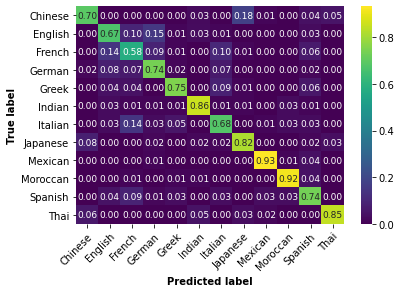

In [40]:
cm = confusion_matrix(y_test, log_reg_best.predict(X_test), normalize="true")
plot_confusion_matrix(cm, class_labels=cuisines_df.to_numpy(dtype="<U28").squeeze())

plt.savefig("confusion_matrix.pdf",bbox_inches='tight')

## Saving Model

In [38]:
FILENAME = 'final_lr_model.sav'
pickle.dump(log_reg_best, open(FILENAME, 'wb'))

In [41]:
# Load from file
with open(FILENAME, 'rb') as file:
    pickle_model = pickle.load(file)

In [42]:
pickle_model

LogisticRegression(C=0.46415888336127786, max_iter=1000)

In [43]:
# Calculate Accuracy
test_scores = pickle_model.score(X_test, y_test)
print(f"Accuracy on test set: {test_scores}")

preds_test = log_reg_best.predict_proba(X_test)
log_score_test = log_loss(y_test, preds_test)

print(f"Loss on test set: {log_score_test}")

Accuracy on test set: 0.7665094339622641
Loss on test set: 0.7376701950675907
